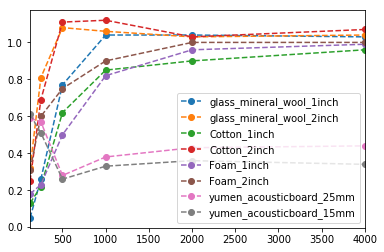

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from scipy.interpolate import interp1d


col = np.array([125,250,500,1000,2000,4000])
df = pd.DataFrame()
df['glass_mineral_wool_1inch'] = np.array([0.05,0.26,0.77,1.04,1.04,1.03])
df['glass_mineral_wool_2inch'] = np.array([0.32,0.81,1.08,1.06,1.03,1.04])
df['Cotton_1inch'] = np.array([0.13,0.22,0.62,0.85,0.9,0.96])
df['Cotton_2inch'] = np.array([0.25,0.69,1.11,1.12,1.03,1.07])
df['Foam_1inch'] = np.array([0.18,0.23,0.5,0.82,0.96,0.99])
df['Foam_2inch'] = np.array([0.31,0.60,0.75,0.90,1,1])
df['yumen_acousticboard_25mm'] = np.array([0.59,0.57,0.28,0.38,0.43,0.44])
df['yumen_acousticboard_15mm'] = np.array([0.61,0.51,0.26,0.33,0.36,0.34])


third_freq = np.array([125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000])
missing_freq = set(third_freq) - set(col)

df = df.T
df.columns = col
df.T.plot(style='--o')
plt.show()

In [2]:
df

,125,250,500,1000,2000,4000
glass_mineral_wool_1inch,0.05,0.26,0.77,1.04,1.04,1.03
glass_mineral_wool_2inch,0.32,0.81,1.08,1.06,1.03,1.04
Cotton_1inch,0.13,0.22,0.62,0.85,0.90,0.96
Cotton_2inch,0.25,0.69,1.11,1.12,1.03,1.07
Foam_1inch,0.18,0.23,0.50,0.82,0.96,0.99
Foam_2inch,0.31,0.60,0.75,0.90,1.00,1.00
yumen_acousticboard_25mm,0.59,0.57,0.28,0.38,0.43,0.44
yumen_acousticboard_15mm,0.61,0.51,0.26,0.33,0.36,0.34


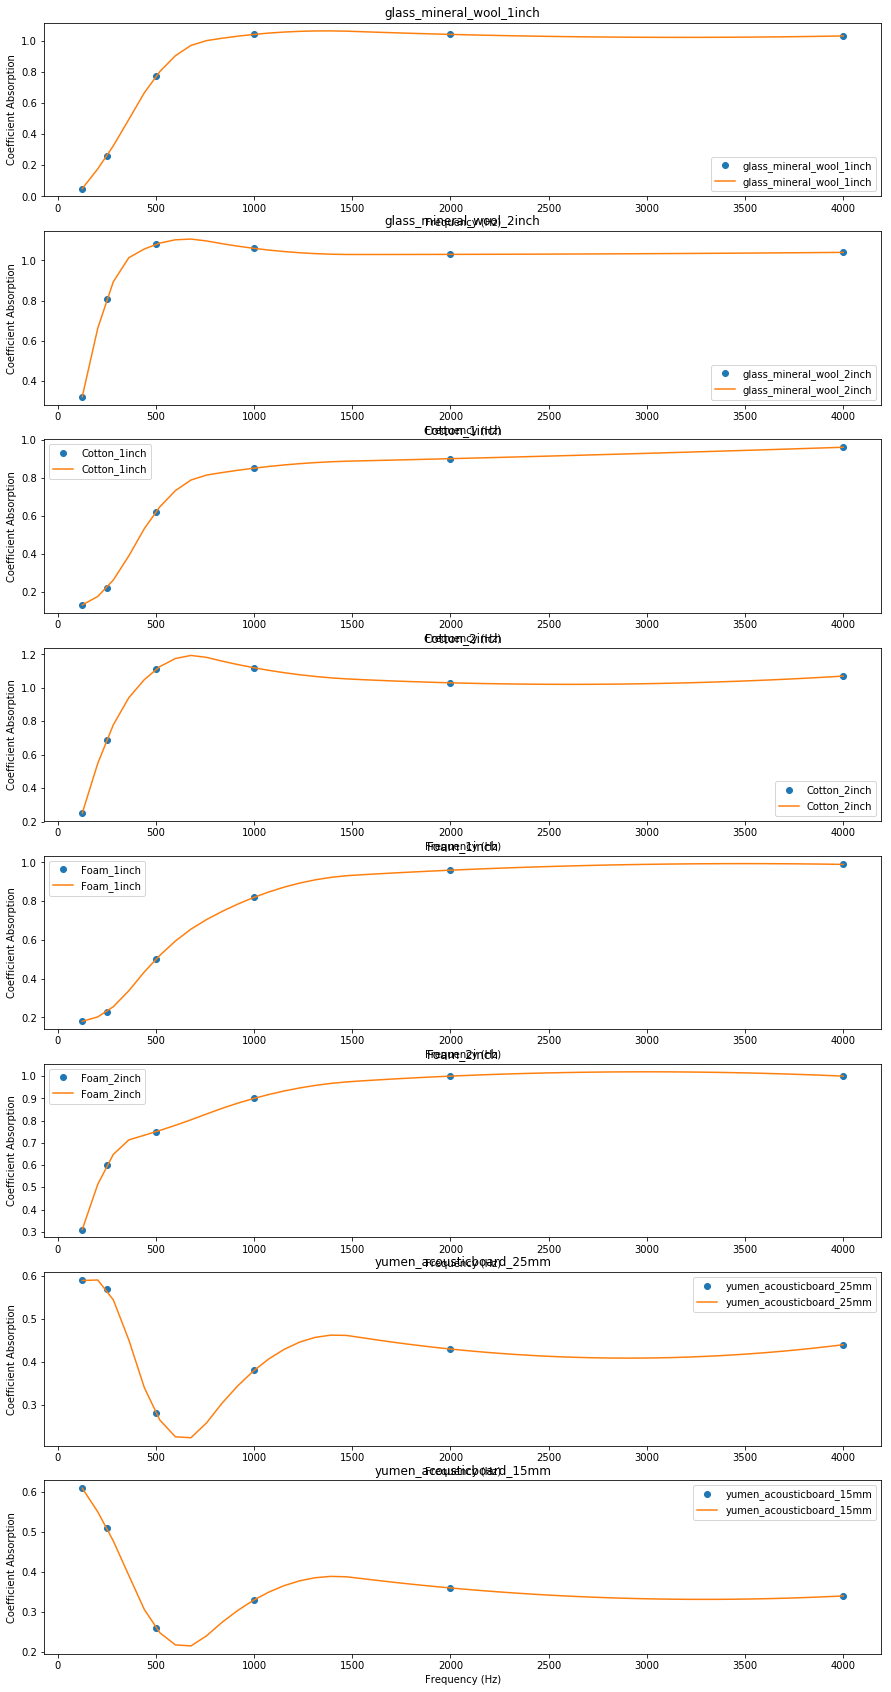

In [3]:
space = np.linspace(125,4000,50)
df2 = pd.DataFrame()
coef = np.empty([df.shape[0],3])
fig, axs = plt.subplots(df.shape[0],1,figsize=(15, 30))
axs = axs.ravel()
for i in range(df.shape[0]):
    y = df.iloc[i,:]
    x = df.columns.values
    interpolation = interp1d(x,y,kind='quadratic')
    axs[i].plot(x, y, 'o', space, interpolation(space), '-')
    axs[i].set_title(y.name)
    axs[i].legend()
    axs[i].set_xlabel('Frequency (Hz)')
    axs[i].set_ylabel('Coefficient Absorption')
    df2[y.name] = interpolation(third_freq)

plt.show()

df2 = df2.T
df2.columns = third_freq

In [4]:
df2

,125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000
glass_mineral_wool_1inch,0.05,0.103395,0.169565,0.26,0.390392,0.579947,0.77,0.932763,1.008431,1.04,1.060366,1.055068,1.04,1.027291,1.020944,1.03
glass_mineral_wool_2inch,0.32,0.485177,0.647306,0.81,0.955111,1.036537,1.08,1.105656,1.089480,1.06,1.037008,1.029468,1.03,1.031353,1.034255,1.04
Cotton_1inch,0.13,0.144837,0.171663,0.22,0.307431,0.460172,0.62,0.756924,0.820797,0.85,0.875076,0.889884,0.90,0.913528,0.932582,0.96
Cotton_2inch,0.25,0.390244,0.534291,0.69,0.851976,0.996694,1.11,1.185961,1.169987,1.12,1.075707,1.046289,1.03,1.021025,1.028269,1.07
Foam_1inch,0.18,0.186534,0.201111,0.23,0.285273,0.385687,0.50,0.619558,0.727948,0.82,0.897588,0.939436,0.96,0.978878,0.992079,0.99
Foam_2inch,0.31,0.408615,0.504732,0.60,0.682523,0.723481,0.75,0.788138,0.843485,0.90,0.949596,0.981419,1.00,1.014517,1.018920,1.00
yumen_acousticboard_25mm,0.59,0.596334,0.592207,0.57,0.512813,0.393933,0.28,0.219861,0.282754,0.38,0.449129,0.452963,0.43,0.412998,0.410332,0.44
yumen_acousticboard_15mm,0.61,0.585418,0.554069,0.51,0.444601,0.347315,0.26,0.213010,0.258589,0.33,0.380025,0.380476,0.36,0.342128,0.331724,0.34
